In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
import scipy.interpolate as inter
from scipy.special import erf

## Load comparison templates

In [3]:
phase_h, wavelength_hsiao, flux_hsiao = np.loadtxt('../data/info_files/hsiao_template.dat', unpack = True)

In [4]:
epoch_n, wavelength_nugent, flux_nugent = np.loadtxt('../data/info_files/nugent_templates.dat', unpack = True)
epoch_n_91t, wavelength_nugent_91t, flux_nugent_91t = np.loadtxt('../data/info_files/nugent_91t_templates.dat', unpack = True)
epoch_n_91bg, wavelength_nugent_91bg, flux_nugent_91bg = np.loadtxt('../data/info_files/nugent_91bg_templates.dat', unpack = True)

In [5]:
phase_s, wavelength_salt, flux_salt = np.loadtxt('../data/info_files/SALT/salt2-4/salt2_template_0.dat', unpack = True)

In [6]:
t_h, U_h, B_h, V_h, R_h, I_h, Y_h, J_h, H_h, K_h = np.loadtxt('../data/info_files/hsiao_lc_template.dat', unpack = True)

In [7]:
t_n, U_n, B_n, V_n, R_n, I_n, J_n, H_n, K_n = np.loadtxt('../data/info_files/nugent_light_curves.dat', unpack = True)

In [8]:
hsiao_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_h):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            hsiao_temps[float(phase_h[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_hsiao[i]]
        temp_flux = [flux_hsiao[i]]
    else:
        temp_wave.append(wavelength_hsiao[i])
        temp_flux.append(flux_hsiao[i])
    first = False

In [9]:
nug_temps = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps[float(epoch_n[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent[i]]
        temp_flux = [flux_nugent[i]]
    else:
        temp_wave.append(wavelength_nugent[i])
        temp_flux.append(flux_nugent[i])
    first = False

nug_temps_91t = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n_91t):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps_91t[float(epoch_n_91t[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent_91t[i]]
        temp_flux = [flux_nugent_91t[i]]
    else:
        temp_wave.append(wavelength_nugent_91t[i])
        temp_flux.append(flux_nugent_91t[i])
    first = False
    
nug_temps_91bg = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n_91bg):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps_91bg[float(epoch_n_91bg[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent_91bg[i]]
        temp_flux = [flux_nugent_91bg[i]]
    else:
        temp_wave.append(wavelength_nugent_91bg[i])
        temp_flux.append(flux_nugent_91bg[i])
    first = False

In [10]:
salt_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_s):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            salt_temps[float(phase_s[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_salt[i]]
        temp_flux = [flux_salt[i]]
    else:
        temp_wave.append(wavelength_salt[i])
        temp_flux.append(flux_salt[i])
    first = False

## Interpolate templates

In [11]:
wave_h = hsiao_temps[0.][0]
flux_h = hsiao_temps[0.][1]

In [12]:
wave_interp_h = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h = inter.splrep(wave_h, flux_h)
flux_interp_h = inter.splev(wave_interp_h, flux_spl_h, ext = 3)
h_template = composite.supernova(wave_interp_h, flux_interp_h)
h_template.phase_array = np.zeros(len(flux_interp_h))

In [13]:
wave_n = nug_temps[0.][0]
flux_n = nug_temps[0.][1]

wave_n_91t = nug_temps_91t[0.][0]
flux_n_91t = nug_temps_91t[0.][1]

wave_n_91bg = nug_temps_91bg[0.][0]
flux_n_91bg = nug_temps_91bg[0.][1]

In [14]:
wave_interp_n = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n = inter.splrep(wave_n, flux_n)
flux_interp_n = inter.splev(wave_interp_n, flux_spl_n, ext = 3)
n_template = composite.supernova(wave_interp_n,flux_interp_n)
n_template.phase_array = np.zeros(len(flux_interp_n))

wave_interp_n_91t = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_91t = inter.splrep(wave_n_91t, flux_n_91t)
flux_interp_n_91t = inter.splev(wave_interp_n_91t, flux_spl_n_91t, ext = 3)
n_template_91t = composite.supernova(wave_interp_n_91t,flux_interp_n_91t)
n_template_91t.phase_array = np.zeros(len(flux_interp_n_91t))

wave_interp_n_91bg = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_91bg = inter.splrep(wave_n_91bg, flux_n_91bg)
flux_interp_n_91bg = inter.splev(wave_interp_n_91bg, flux_spl_n_91bg, ext = 3)
n_template_91bg = composite.supernova(wave_interp_n_91bg,flux_interp_n_91bg)
n_template_91bg.phase_array = np.zeros(len(flux_interp_n_91bg))

In [15]:
wave_s = salt_temps[0.][0]
flux_s = salt_temps[0.][1]

In [16]:
wave_interp_s = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s = inter.splrep(wave_s, flux_s)
flux_interp_s = inter.splev(wave_interp_s, flux_spl_s, ext = 3)
s_template = composite.supernova(wave_interp_s, flux_interp_s)
s_template.phase_array = np.zeros(len(flux_interp_s))

## Maximum light - normal Ia composite spectrum

In [17]:
# query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1",
#          "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.02 and dm15_source < 1.24) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.24))"]
query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))",
         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"]

In [18]:
composites, sn_arrays, boot_sn_arrays = query_db.main(len(query), query, boot=True, medmean=1, gini_balance = True, verbose=False, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
200 Total Spectra found
5 flagged spectra removed 195 spectra left
3 spectra of peculiar Ias removed 192 spectra left
178 spectra of SNe with that have host reddening corrections
Arrays cleaned
5 spectra may have telluric contamination


composite.py:1220: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1257: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


105 total SNe
removed spectra of SNe with A_V > 2.0

Using 170 spectra of 102 SNe


gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)


Gini balancing...
Balanced after 24 iterations
Bootstrapping
scaling boots...


C:\Program Files\Anaconda2\lib\site-packages\scipy\optimize\optimize.py:527: RuntimeWarning: invalid value encountered in absolute
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and


computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
77 Total Spectra found
3 flagged spectra removed 74 spectra left
0 spectra of peculiar Ias removed 74 spectra left
65 spectra of SNe with that have host reddening corrections
Arrays cleaned
2 spectra may have telluric contamination
38 total SNe
removed spectra of SNe with A_V > 2.0

Using 61 spectra of 36 SNe


gini.py:48: RuntimeWarning: invalid value encountered in double_scalars
  gini_coeffs.append(gini_num/gini_denom)


Gini balancing...
Balanced after 13 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


In [19]:
query_db.set_min_num_spec(composites, 5)

In [20]:
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template)
comps_and_temps.append(n_template)
comps_and_temps.append(s_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

## Generate photometry from template spectra and compare to template light curves

In [21]:
import pyphot

In [22]:
from pyphot.vega import Vega
vega = Vega()
lib = pyphot.get_library()
f = lib['GROUND_JOHNSON_B']
# compute the integrated flux through the filter f
# note that it work on many spectra at once
fluxes = f.get_flux(vega.wavelength, vega.flux, axis=-1)
# convert to vega magnitudes
mags = -2.5 * np.log10(fluxes) - f.Vega_zero_mag
print("Vega magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.AB_zero_mag
print("AB magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.ST_zero_mag
print("ST magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))

Vega magnitude of Vega in GROUND_JOHNSON_B is : 0.000000 mag
AB magnitude of Vega in GROUND_JOHNSON_B is : -0.074212 mag
ST magnitude of Vega in GROUND_JOHNSON_B is : -0.587021 mag


In [23]:
lib = pyphot.get_library()
B = lib['GROUND_JOHNSON_B']
V = lib['GROUND_JOHNSON_V']
hsiao_fluxB = B.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_fluxV = V.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.Vega_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.Vega_zero_mag
print hsiao_magB, hsiao_magV
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.AB_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.AB_zero_mag
print hsiao_magB, hsiao_magV

-0.0387656219521 0.0423946332271
-0.112977534603 0.0345530104216


In [24]:
hsiao_B = []
hsiao_V = []
i=-20.
phases_h = []
while i <= np.amax(hsiao_temps.keys()):
    Bflux = B.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    hsiao_B.append(Bmag)
    hsiao_V.append(Vmag)
    phases_h.append(i)
    i+=1

In [25]:
nug_B = []
nug_V = []
i=-20.
phases_n = []
while i <= np.amax(nug_temps.keys()):
    Bflux = B.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    nug_B.append(Bmag)
    nug_V.append(Vmag)
    phases_n.append(i)
    i+=1

In [26]:
salt_B = []
salt_V = []
i=-20.
phases_s = []
while i <= np.amax(salt_temps.keys()):
    Bflux = B.get_flux(np.asarray(salt_temps[i][0]), np.asarray(salt_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(salt_temps[i][0]), np.asarray(salt_temps[i][1]), axis = -1)
#     Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    salt_B.append(Bmag)
    salt_V.append(Vmag)
    phases_s.append(i)
    i+=1

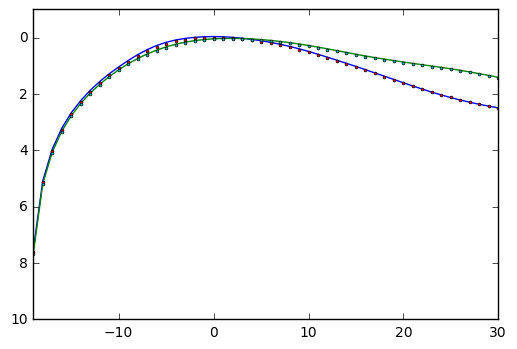

In [27]:
plt.plot(phases_h, hsiao_B)
plt.plot(phases_h, hsiao_V)
plt.plot(t_h, B_h, 'o', markersize=2)
plt.plot(t_h, V_h, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

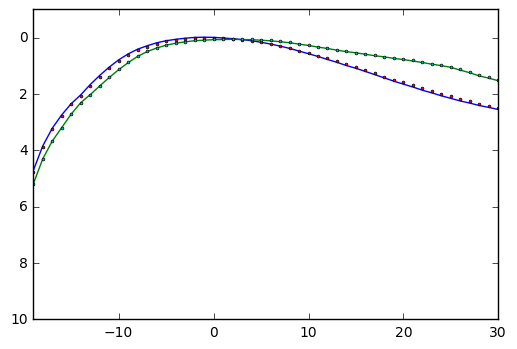

In [28]:
plt.plot(phases_n, nug_B)
plt.plot(phases_n, nug_V)
plt.plot(t_n, B_n, 'o', markersize=2)
plt.plot(t_n, V_n, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

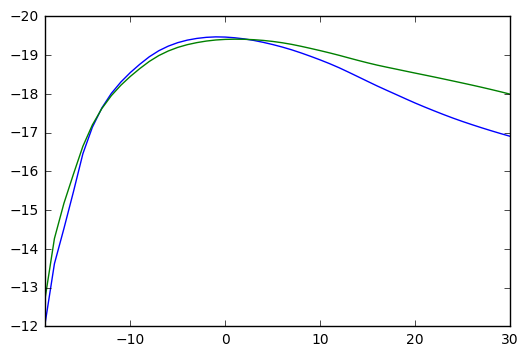

In [29]:
salt_B[0] = np.nan
salt_V[0] = np.nan
plt.plot(phases_s, salt_B)
plt.plot(phases_s, salt_V)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.show()

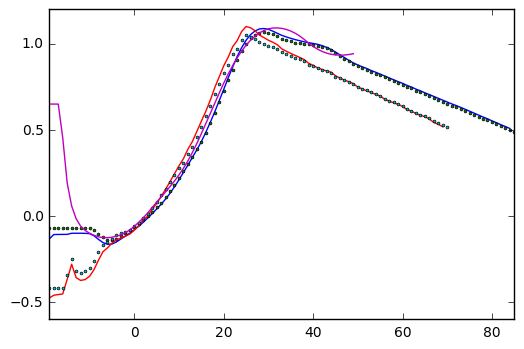

In [30]:
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V))
plt.plot(t_h, np.asarray(B_h) - np.asarray(V_h), 'o', markersize=2)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V))
plt.plot(t_n, np.asarray(B_n) - np.asarray(V_n), 'o', markersize=2)
plt.plot(phases_s, np.asarray(salt_B)-np.asarray(salt_V))
plt.xlim([-19,85])
plt.show()

## Composite spectral time series for normal - Ias and non dm15 controlled

In [31]:
#changeable phase bin size
query_strings_all = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))"]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    if p1 > 30.:
        k=7
        p2=p1+4
    query_strings_all.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))"% (p1,p2))
    p1 += k
    p2 += k
print query_strings_all

['SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8.000000 and phase < -6.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6.000000 and phase < -4.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -2.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_f

In [32]:
query_strings_dm15 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    if p1 > 30.:
        k=7
        p2=p1+4
    query_strings_dm15.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_dm15:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8.000000 and phase < -6.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6.000000 and phase < -4.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -2.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >

In [33]:
composites_all, sn_arrays_all, boot_sn_arrays_all = query_db.main(len(query_strings_all), query_strings_all, boot=True, medmean=1, gini_balance = True, verbose=False, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
43 Total Spectra found
0 flagged spectra removed 43 spectra left
0 spectra of peculiar Ias removed 43 spectra left
35 spectra of SNe with that have host reddening corrections
Arrays cleaned
4 spectra may have telluric contamination
15 total SNe
removed spectra of SNe with A_V > 2.0

Using 35 spectra of 15 SNe
Gini balancing...
Balanced after 18 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
85 Total Spectra found
1 flagged spectra removed 84 spectra left
3 spectra of peculiar Ias removed 81 spectra left
67 spectra of SNe with that have host reddening

In [35]:
composites_dm15, sn_arrays_dm15, boot_sn_arrays_dm15 = query_db.main(len(query_strings_dm15), query_strings_dm15, boot=True, medmean=1, gini_balance = True, verbose=False,combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
25 Total Spectra found
0 flagged spectra removed 25 spectra left
0 spectra of peculiar Ias removed 25 spectra left
23 spectra of SNe with that have host reddening corrections
Arrays cleaned
3 spectra may have telluric contamination
6 total SNe
removed spectra of SNe with A_V > 2.0

Using 23 spectra of 6 SNe
Gini balancing...
Balanced after 7 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
41 Total Spectra found
1 flagged spectra removed 40 spectra left
0 spectra of peculiar Ias removed 40 spectra left
31 spectra of SNe with that have host reddenin

## Average phases of each composite in time series

In [36]:
comp_phases = []
comp_B = []
comp_V = []
query_db.set_min_num_spec(composites_all, 5)
for comp in composites_all:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B.append(Bmag)
    comp_V.append(Vmag)
    comp_phases.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases
print comp_B
print comp_V

[-10.517591892408348, -8.8557120994050553, -6.9999814839274217, -4.8167327052473006, -2.9204492307618137, -0.9267891882262449, 0.91421365830194412, 2.8022746683216027, 5.00290073249906, 6.8444774819103733, 8.9393891339963218, 10.985695760757165, 12.831020864657457, 14.932774212812795, 17.011390928474675, 19.023226600634789, 20.962135170108382, 23.09740509823888, 24.892484984255965, 26.931152844259231, 29.11650104749128, 31.115408223685876, 34.023931278523904, 41.109244209947171, 47.901130865849233, 55.575971514490817]
[-20.090861546548695, -20.065482119290763, -20.043111161557828, -20.034502586852213, -20.043956838841233, -20.056059105459305, -20.075373100030873, -20.140659497720325, -20.083239553350801, -20.066925399668808, -20.041512629442046, -19.979765007291881, -19.860908930989105, -19.800919587122706, -19.740980778464053, -19.794943735850069, -19.733581721627743, -19.562308272191849, -19.575148954410142, -19.536652629301262, -19.580649931212449, -19.577593600261654, -19.639659083

In [37]:
comp_phases_dm15 = []
comp_B_dm15 = []
comp_V_dm15 = []
query_db.set_min_num_spec(composites_dm15, 5)
for comp in composites_dm15:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B_dm15.append(Bmag)
    comp_V_dm15.append(Vmag)
    comp_phases_dm15.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases_dm15
print comp_B_dm15
print comp_V_dm15

[-10.670559568992607, -8.9152804707873656, -6.8915080960208561, -4.9866850127919857, -2.8514599260121218, -0.93714414179412386, 0.97745278111340184, 2.9266873850873076, 4.9252252806430104, 6.8541665250607746, 9.0603985291998477, 11.032180814404152, 12.96969804134392, 15.03021542915846, 16.89318497176281, 19.165582033865157, 20.965719140111734, 22.957212663936623, 24.918385172659701, 26.922763757026541, 29.074920884734343, 31.097874582597814, 34.273846589008208, 40.524310524815839, 47.601256767367936, 55.500913837918283]
[-20.06315668551834, -20.017255778428105, -20.022201164372522, -20.020185329586528, -19.994341669479027, -20.007115750235666, -20.025825725031016, -20.126864034235915, -20.070262475521904, -20.062540709477108, -20.024221272667468, -19.966293382707477, -19.845568222339434, -19.797046907020665, -19.724515910587968, -19.76811973678458, -19.775460528296712, -19.568807172869469, -19.607367964197437, -19.484669356510459, -19.56967910998031, -19.550917005558151, -19.6464474767

## Measure error on composite colors from bootstrapped templates

In [38]:
#bootstrap colors
boot_BmVs = []
for boots in boot_sn_arrays_all:
    boot_B = []
    boot_V = []
    for b in boots:
        Bflux = B.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Vflux = V.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
        Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    #     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    #     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
        boot_B.append(Bmag)
        boot_V.append(Vmag)
    BmV = np.asarray(boot_B) - np.asarray(boot_V)
    boot_BmVs.append(BmV)

In [39]:
low_errors = []
up_errors = []
boot_resids = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
for k in range(len(boot_sn_arrays_all)):
    resids = []
    comp_BmVs = np.asarray(comp_B[k]) - np.asarray(comp_V[k])
    resids.append(boot_BmVs[k] - comp_BmVs)
    resid_sort = np.sort(resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
errors = [low_errors, up_errors]

In [40]:
#bootstrap colors dm15
boot_BmVs_dm15 = []
for boots in boot_sn_arrays_dm15:
    boot_B = []
    boot_V = []
    for b in boots:
        Bflux = B.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Vflux = V.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
        Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    #     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    #     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
        boot_B.append(Bmag)
        boot_V.append(Vmag)
    BmV = np.asarray(boot_B) - np.asarray(boot_V)
    boot_BmVs_dm15.append(BmV)

In [41]:
low_errors_dm15 = []
up_errors_dm15 = []
boot_resids_dm15 = []
for k in range(len(boot_sn_arrays_dm15)):
    resids = []
    comp_BmVs_dm15 = np.asarray(comp_B_dm15[k]) - np.asarray(comp_V_dm15[k])
    resids.append(boot_BmVs_dm15[k] - comp_BmVs_dm15)
    resids = [[x for x in resids[0] if str(x) != 'nan']]
    if k == 6:
        print resids, len(resids[0])
    resid_sort = np.sort(resids)[0]
    boot_resids_dm15.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors_dm15.append(np.absolute(resid_sort[low_ind]))
    up_errors_dm15.append(resid_sort[up_ind])
errors_dm15 = [low_errors_dm15, up_errors_dm15]

[[0.014857171494949029, -0.0072267582645579864, -0.02364215395324365, 0.0050993083423591656, 0.011503416582389292, 0.021259127762643715, -0.00059996665617489953, 0.036103085147001224, -0.010292625648911979, 0.0084213498908773943, 0.0065943372724568405, -0.012456717416306162, -0.010193591254857637, 0.016841899441459418, 0.010012820080358864, 0.019656068455116582, 0.01950900473761763, -0.014674340539219344, 0.015237367759809217, 0.01943145059484408, 0.011818218185570828, -0.007224474819352622, 0.0028931768943358804, 0.013590135707698181, -0.024739672984154026, 0.00060212545718130173, -0.00078464719454984788, -0.028220609696617771, -0.028133138408925618, 0.011875581393049117, 0.031974485933520924, -0.016142280444945811, -0.022464701318696711, 0.00091861864477493782, 0.0030153897898443915, -0.013489404553666873, 0.011395588401189372, 0.0070167879110165643, -0.0037112458203054643, 0.0014779219448222136, 0.0015904198343434928, 0.0038483348541156204, -0.007230507792264973, 0.02385842375467106

In [42]:
dm15s = []
for comp in composites_all:
    dm15s.append(np.nanmean(comp.dm15_array[comp.x1:comp.x2]))
print np.nanmean(dm15s)
print np.nanmin(dm15s), np.nanmax(dm15s)
dm15s = []
for comp in composites_dm15:
    dm15s.append(np.nanmean(comp.dm15_array[comp.x1:comp.x2]))
print np.nanmean(dm15s)
print np.amin(dm15s), np.amax(dm15s)

1.10762734285
1.02516394798 1.18986743536
1.0863541339
1.06888993482 1.11426665883


In [43]:
# import glob
# print glob.glob('../data/info_files/*.dat')
b_mlcs = np.genfromtxt('../data/info_files\\vectors_nouv-rv19-tweaked_B.dat', unpack=True)
v_mlcs = np.genfromtxt('../data/info_files\\vectors_nouv-rv19-tweaked_V.dat', unpack=True)

Last Run: 
Comp B-V: [-0.01444363 -0.06621905 -0.14702678 -0.17811379 -0.14796714 -0.11401718
 -0.07024489  0.03464599  0.06281541  0.18966743  0.27021204  0.34660448
  0.52375924  0.62678229  0.73451564  0.83051085  0.90135268  1.01735426
  0.98702352  1.01362129  0.96350396  0.96917049  0.9255177   0.85368383
  0.78737407  0.67697628]
Comp err:  [[0.037723096103427167, 0.040460399571365713, 0.01819072769481167, 0.015900837675669521, 0.016230544934032309, 0.012905724567517041, 0.013553555023538166, 0.01989417527128623, 0.021320771045093778, 0.025057924892781358, 0.022780914584913603, 0.020731864676946543, 0.056888416753217541, 0.039375965830096504, 0.051645780642200378, 0.048761553464004237, 0.023954533042324755, 0.039802115540201299, 0.025761334892923315, 0.051032990281527191, 0.022818981095998225, 0.037512734190546126, 0.023110096913342204, 0.019436519391550888, 0.038928081784948887, 0.030495071074650326], [0.038997310114158523, 0.053827132504149944, 0.021625283457957778, 0.01967487

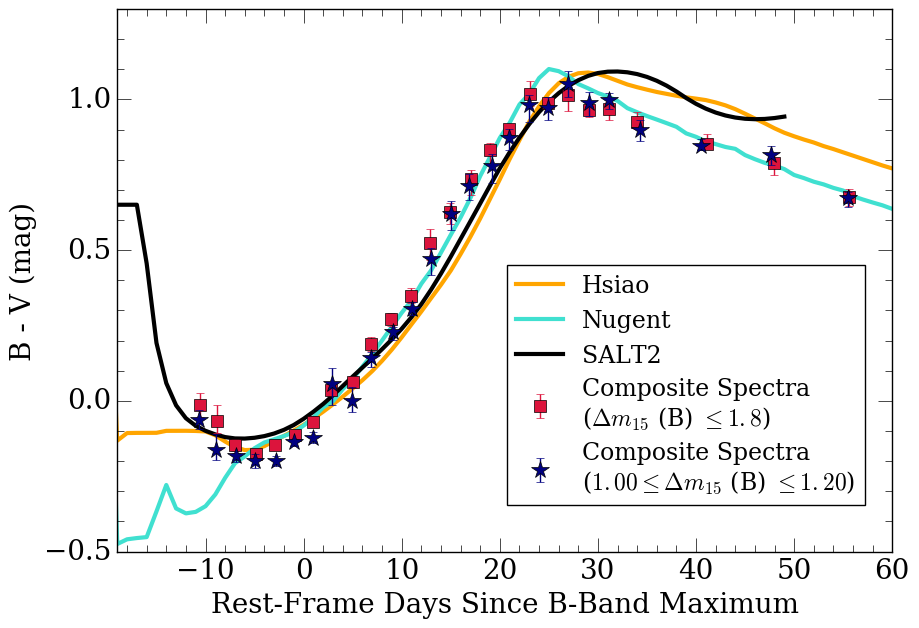

In [45]:
color_dict = {"Comp": "#000080", "Hsiao": "orange", "Nugent": "turquoise", "SALT-II": "black"}
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)
plt.xlabel('Rest-Frame Days Since B-Band Maximum', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V), color = color_dict['Hsiao'], label = 'Hsiao', linewidth=3, zorder=-1)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V), color = color_dict['Nugent'], label = 'Nugent', linewidth=3, zorder=-1)
plt.plot(phases_s, np.asarray(salt_B)-np.asarray(salt_V), color = color_dict['SALT-II'],label='SALT2', linewidth=3, zorder=-1)
# plt.plot(b_mlcs[0], b_mlcs[1] - v_mlcs[1], color = 'magenta', label = 'MLCS', linewidth=3, zorder=-1)
plt.errorbar(comp_phases, np.asarray(comp_B) - np.asarray(comp_V), yerr=errors, fmt='s', markersize=8, color = "crimson", label = 'Composite Spectra \n($\Delta m_{15}$ (B) $\leq 1.8$)', zorder=-.6)
plt.errorbar(comp_phases_dm15, np.asarray(comp_B_dm15) - np.asarray(comp_V_dm15), yerr=errors_dm15, fmt='*', markersize=13, color = color_dict['Comp'], label = 'Composite Spectra \n($1.00 \leq \Delta m_{15}$ (B) $\leq 1.20$)', zorder=-.5)
plt.xlim([-19,60])
plt.ylim([-.5,1.3])
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.05, 0.48, 0.5),numpoints=1, fontsize=17)
# plt.savefig('../../../Paper_Drafts/template_comparisons_updated/color_curve.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/color_curve.png', dpi = 300, bbox_inches = 'tight')
print 'Last Run: '
print 'Comp B-V:', np.asarray(comp_B) - np.asarray(comp_V)
print 'Comp err: ', errors
print 'Comp B-V dm15: ', np.asarray(comp_B_dm15) - np.asarray(comp_V_dm15)
print 'Comp err: ', errors_dm15
plt.show()

## Foley08 Templates

In [46]:
wavelength_f08_m7, flux_f08_m7, low_f08_m7, up_f08_m7 = np.loadtxt('../data/foley/foley=0.01=-6.6=-0.08=0.37=47.flm', unpack = True)
wavelength_f08_0, flux_f08_0, low_f08_0, up_f08_0 = np.loadtxt('../data/foley/foley=0.02=0.5=-0.02=0.46=45.flm', unpack = True)
wavelength_f08_p6, flux_f08_p6, low_f08_p6, up_f08_p6 = np.loadtxt('../data/foley/foley=0.01=6.2=0.08=0.28=45.flm', unpack = True)
wavelength_f08_p14, flux_f08_p14, low_f08_p14, up_f08_p14 = np.loadtxt('../data/foley/foley=0.01=13.8=0.06=0.42=43.flm', unpack = True)
wavelength_f08_p19, flux_f08_p19, low_f08_p19, up_f08_p19 = np.loadtxt('../data/foley/foley=0.01=19.4=-0.02=0.59=26.flm', unpack = True)

In [47]:
#-1week
wave_interp_f08_m7 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_m7 = inter.splrep(wavelength_f08_m7, flux_f08_m7)
low_spl_f08_m7 = inter.splrep(wavelength_f08_m7, low_f08_m7)
up_spl_f08_m7 = inter.splrep(wavelength_f08_m7, up_f08_m7)

flux_interp_f08_m7 = inter.splev(wave_interp_f08_m7, flux_spl_f08_m7, ext = 3)
low_interp_f08_m7 = inter.splev(wave_interp_f08_m7, low_spl_f08_m7, ext = 3)
up_interp_f08_m7 = inter.splev(wave_interp_f08_m7, up_spl_f08_m7, ext = 3)

f08_template_m7 = composite.supernova(wave_interp_f08_m7, flux_interp_f08_m7, low_conf=low_interp_f08_m7, up_conf=up_interp_f08_m7)
f08_template_m7.phase_array = np.zeros(len(flux_interp_f08_m7))

#max
wave_interp_f08_0 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_0 = inter.splrep(wavelength_f08_0, flux_f08_0)
low_spl_f08_0 = inter.splrep(wavelength_f08_0, low_f08_0)
up_spl_f08_0 = inter.splrep(wavelength_f08_0, up_f08_0)

flux_interp_f08_0 = inter.splev(wave_interp_f08_0, flux_spl_f08_0, ext = 3)
low_interp_f08_0 = inter.splev(wave_interp_f08_0, low_spl_f08_0, ext = 3)
up_interp_f08_0 = inter.splev(wave_interp_f08_0, up_spl_f08_0, ext = 3)

f08_template_0 = composite.supernova(wave_interp_f08_0, flux_interp_f08_0, low_conf=low_interp_f08_0, up_conf=up_interp_f08_0)
f08_template_0.phase_array = np.zeros(len(flux_interp_f08_0))

#+1week
wave_interp_f08_p6 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_p6 = inter.splrep(wavelength_f08_p6, flux_f08_p6)
low_spl_f08_p6 = inter.splrep(wavelength_f08_p6, low_f08_p6)
up_spl_f08_p6 = inter.splrep(wavelength_f08_p6, up_f08_p6)

flux_interp_f08_p6 = inter.splev(wave_interp_f08_p6, flux_spl_f08_p6, ext = 3)
low_interp_f08_p6 = inter.splev(wave_interp_f08_p6, low_spl_f08_p6, ext = 3)
up_interp_f08_p6 = inter.splev(wave_interp_f08_p6, up_spl_f08_p6, ext = 3)

f08_template_p6 = composite.supernova(wave_interp_f08_p6, flux_interp_f08_p6, low_conf=low_interp_f08_p6, up_conf=up_interp_f08_p6)
f08_template_p6.phase_array = np.zeros(len(flux_interp_f08_m7))

#+2week
wave_interp_f08_p14 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_p14 = inter.splrep(wavelength_f08_p14, flux_f08_p14)
low_spl_f08_p14 = inter.splrep(wavelength_f08_p14, low_f08_p14)
up_spl_f08_p14 = inter.splrep(wavelength_f08_p14, up_f08_p14)

flux_interp_f08_p14 = inter.splev(wave_interp_f08_p14, flux_spl_f08_p14, ext = 3)
low_interp_f08_p14 = inter.splev(wave_interp_f08_p14, low_spl_f08_p14, ext = 3)
up_interp_f08_p14 = inter.splev(wave_interp_f08_p14, up_spl_f08_p14, ext = 3)

f08_template_p14 = composite.supernova(wave_interp_f08_p14, flux_interp_f08_p14, low_conf=low_interp_f08_p14, up_conf=up_interp_f08_p14)
f08_template_p14.phase_array = np.zeros(len(flux_interp_f08_p14))

#+19days
wave_interp_f08_p19 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_p19 = inter.splrep(wavelength_f08_p19, flux_f08_p19)
low_spl_f08_p19 = inter.splrep(wavelength_f08_p19, low_f08_p19)
up_spl_f08_p19 = inter.splrep(wavelength_f08_p19, up_f08_p19)

flux_interp_f08_p19 = inter.splev(wave_interp_f08_p19, flux_spl_f08_p19, ext = 3)
low_interp_f08_p19 = inter.splev(wave_interp_f08_p19, low_spl_f08_p19, ext = 3)
up_interp_f08_p19 = inter.splev(wave_interp_f08_p19, up_spl_f08_p19, ext = 3)

f08_template_p19 = composite.supernova(wave_interp_f08_p19, flux_interp_f08_p19, low_conf=low_interp_f08_p19, up_conf=up_interp_f08_p19)
f08_template_p19.phase_array = np.zeros(len(flux_interp_f08_p19))

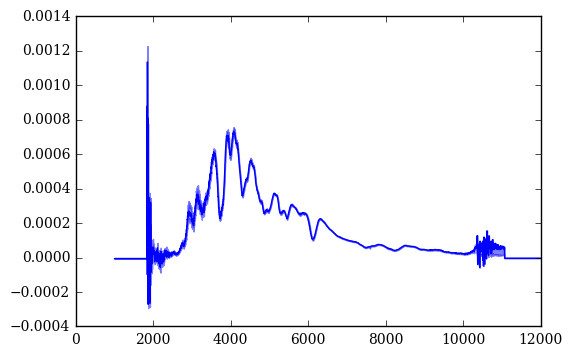

In [48]:
test_template = f08_template_0
plt.plot(test_template.wavelength[test_template.x1:test_template.x2],test_template.flux[test_template.x1:test_template.x2])
plt.fill_between(test_template.wavelength[test_template.x1:test_template.x2],test_template.low_conf[test_template.x1:test_template.x2], test_template.up_conf[test_template.x1:test_template.x2], color='b',alpha=.5)
# plt.ylim([-1,12])
plt.show()

## Spectral feature comparison at various epochs

In [49]:
query_db.set_min_num_spec(composites, 5)
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
srange = np.where((s_template.wavelength > 2000.) & (s_template.wavelength < 9200))[0]
s_template.x1 = srange[0]
s_template.x2 = srange[-1]
comps_and_temps.append(h_template)
comps_and_temps.append(f08_template_0)
comps_and_temps.append(n_template)
comps_and_temps.append(s_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Foley"
comps_and_temps[4].name = "Nugent"
comps_and_temps[5].name = "SALT2"
for comp in comps_and_temps:
    v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
    print comp.name, 'v = ', v_strong
#     r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp = .002, plot=False)
#     print comp.name, 'r = ', r
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2]],include_spec_bin=True, legend_labels = ["Composite Spectrum", "Hsiao",])

1.12566344347
1.08375175358
Comp v =  10997.3983334
Comp v =  10899.6695413
Hsiao v =  10997.3983334
Foley v =  11486.4857972
Nugent v =  12270.5626583
SALT2 v =  11290.7621201


In [50]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2]], include_spec_bin=True, legend_labels = ["Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao",])

Phase:  0.0146048766937
dm15:  1.12566344347
Redshift:  0.0135165579187


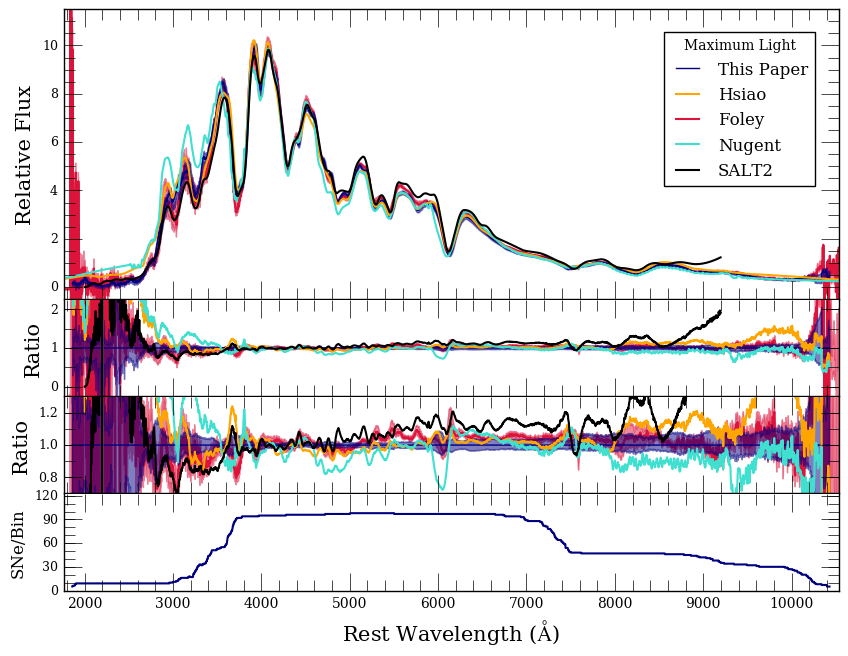

In [52]:
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
                     include_spec_bin=True, legend_labels = ["This Paper", "Hsiao", "Foley","Nugent","SALT2"], 
                     rm_last_label=False, text='Maximum Light', savename = 'template_comparisons_updated/temp_max_light_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
#                      include_spec_bin=True, legend_labels = ["This Paper", "Hsiao", "Foley","Nugent","SALT2"], text='Maximum Light',
#                      rm_last_label=True)

In [50]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
#                      include_spec_bin=True, rm_last_label=True, legend_labels = ["This Paper \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao","Foley", "Nugent","SALT2"], 
#                      text='Maximum Light',savename = 'template_comparisons_updated/temp_max_light_dm15')

Phase:  0.0146048766937
dm15:  1.12566344347
Redshift:  0.0135165579187
Phase:  -0.0824603727699
dm15:  1.08375175358
Redshift:  0.0133724451924


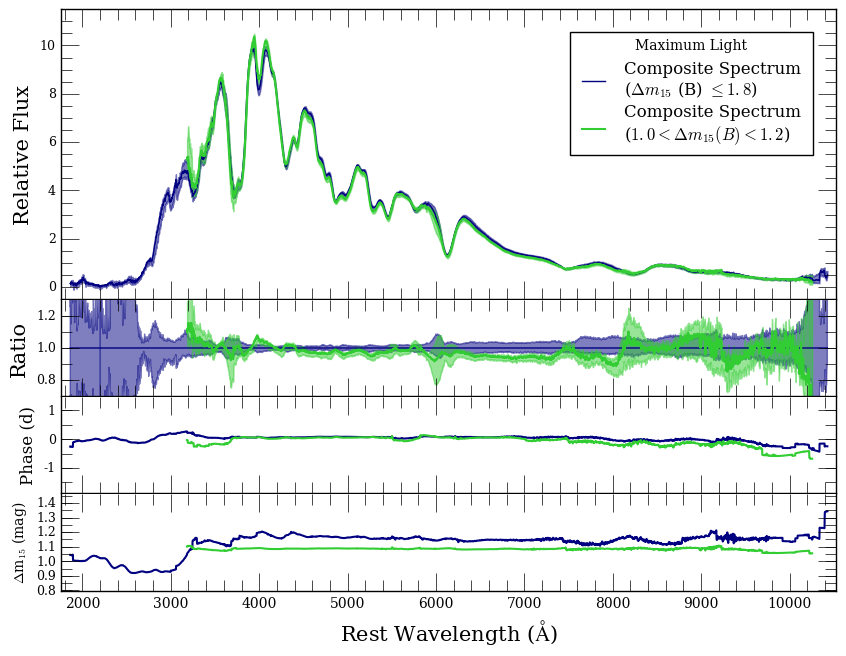

In [53]:
comps_and_temps[1].name = "Comp2"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, rm_last_label=True, include_phase_dm15=True, zoom=False,
                     legend_labels = ["Composite Spectrum \n($\Delta m_{15}$ (B) $\leq 1.8$)","Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)"],
                     text ='Maximum Light', savename = 'template_comparisons_updated/max_light_total_bin_comp')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, rm_last_label=True, include_phase_dm15=True, zoom=False,
#                      legend_labels = ["Composite Spectrum \n($\Delta m_{15}$ (B) $\leq 1.8$)","Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)"],
#                      text ='Maximum Light')

In [54]:
wave_h_1week = []
flux_h_1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == 7.0:
        wave_h_1week.append(wavelength_hsiao[i])
        flux_h_1week.append(flux_hsiao[i])

In [55]:
wave_interp_h_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1week = inter.splrep(wave_h_1week, flux_h_1week)
flux_interp_h_1week = inter.splev(wave_interp_h_1week, flux_spl_h_1week, ext = 3)
h_template_1week = composite.supernova(wave_interp_h_1week, flux_interp_h_1week)
h_template_1week.phase_array = np.zeros(len(flux_interp_h_1week))

In [56]:
wave_n_1week = []
flux_n_1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 27.0:
        wave_n_1week.append(wavelength_nugent[i])
        flux_n_1week.append(flux_nugent[i])

In [57]:
wave_interp_n_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1week = inter.splrep(wave_n_1week, flux_n_1week)
flux_interp_n_1week = inter.splev(wave_interp_n_1week, flux_spl_n_1week, ext = 3)
n_template_1week = composite.supernova(wave_interp_n_1week,flux_interp_n_1week)
n_template_1week.phase_array = np.zeros(len(flux_interp_n_1week))

In [58]:
wave_s_1week = []
flux_s_1week = []
for i, phase in enumerate(phase_s):
    if float(phase) == 7.0:
        wave_s_1week.append(wavelength_salt[i])
        flux_s_1week.append(flux_salt[i])

In [59]:
wave_interp_s_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_1week = inter.splrep(wave_s_1week, flux_s_1week)
flux_interp_s_1week = inter.splev(wave_interp_s_1week, flux_spl_s_1week, ext = 3)
s_template_1week = composite.supernova(wave_interp_s_1week,flux_interp_s_1week)
s_template_1week.phase_array = np.zeros(len(flux_interp_s_1week))

In [60]:
query_1week = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 6 and phase < 8 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))",
         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 8 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"]

In [61]:
composites_1week, sn_arrays_1week, boot_sn_arrays_1week = query_db.main(len(query_1week), query_1week, boot=True, medmean=1, gini_balance=True, verbose=False, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 6 and phase < 8 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
184 Total Spectra found
11 flagged spectra removed 173 spectra left
2 spectra of peculiar Ias removed 171 spectra left
159 spectra of SNe with that have host reddening corrections
Arrays cleaned
5 spectra may have telluric contamination
101 total SNe
removed spectra of SNe with A_V > 2.0

Using 147 spectra of 97 SNe
Gini balancing...
Balanced after 28 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 8 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))
66 Total Spectra found
3 flagged spectra removed 63 spectra left
0 spectra of peculiar Ias removed 63 spectra left
59 spectra of SNe with that have host re

1.13480036905
1.0965122056
Comp v =  10801.9703211 6130.0
Comp v =  10606.6606057 6134.0
Hsiao v =  10899.6695413 6128
Foley v =  10997.3983334 6126
Nugent v =  10606.6606057 6134
SALT2 v =  10801.9703211 6130
Phase:  6.84447748191
dm15:  1.13848016985
Redshift:  0.013565224425


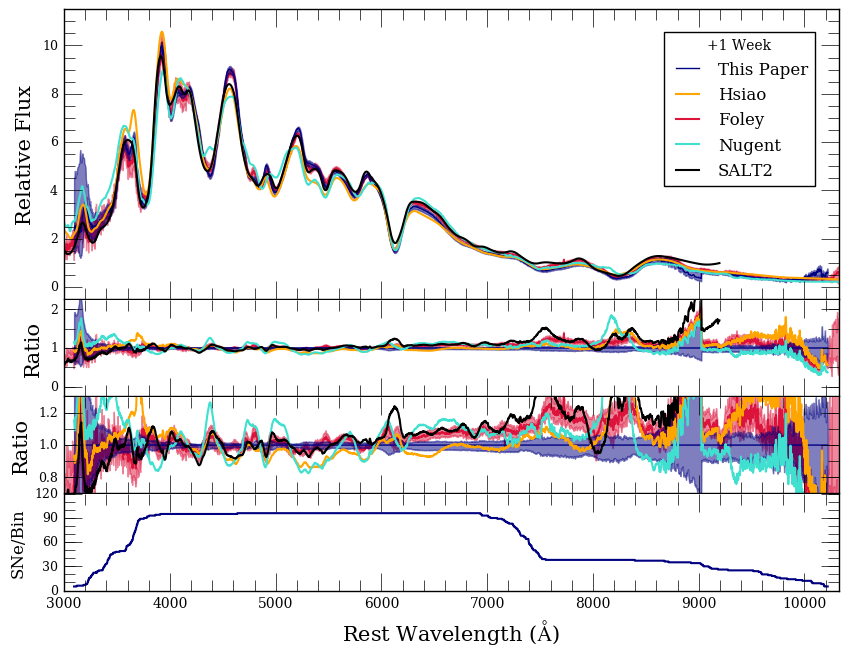

In [62]:
query_db.set_min_num_spec(composites_1week, 5)

comps_and_temps = []
for comp in composites_1week:
    comps_and_temps.append(comp)

srange = np.where((s_template_1week.wavelength > 2000.) & (s_template_1week.wavelength < 9200))[0]
s_template_1week.x1 = srange[0]
s_template_1week.x2 = srange[-1]

comps_and_temps.append(h_template_1week)
comps_and_temps.append(f08_template_p6)
comps_and_temps.append(n_template_1week)
comps_and_temps.append(s_template_1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Foley"
comps_and_temps[4].name = "Nugent"
comps_and_temps[5].name = "SALT2"
for comp in comps_and_temps:
    v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
    print comp.name, 'v = ', v_strong, si_min_wave
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
                     legend_labels = ["This Paper", "Hsiao", "Foley","Nugent","SALT2"], text='+1 Week', rm_last_label=False, zoom=True,
                     savename = 'template_comparisons_updated/temp_p7_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper", "Hsiao", "Foley","Nugent","SALT2"], rm_last_label=True, zoom=True, text='+1 Week')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["Composite Spectrum", "Hsiao", "Foley08","Nugent","SALT2"], text='+1 Week', rm_last_label=True, zoom=True,
#                      )
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

In [63]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley","Nugent","SALT2"],
#                      rm_last_label=True, text='$+$1 Week',
#                      savename = 'template_comparisons_updated/temp_p7_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley","Nugent","SALT2"],
#                      rm_last_label=True, text='+1 Week',)
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)", "Hsiao", "Foley08","Nugent","SALT2"],
#                      rm_last_label=True, text='$+$1 Week')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)", "Hsiao", "Nugent","SALT2"])

In [64]:
wave_h_m1week = []
flux_h_m1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == -7.0:
        wave_h_m1week.append(wavelength_hsiao[i])
        flux_h_m1week.append(flux_hsiao[i])

In [65]:
wave_interp_h_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_m1week = inter.splrep(wave_h_m1week, flux_h_m1week)
flux_interp_h_m1week = inter.splev(wave_interp_h_m1week, flux_spl_h_m1week, ext = 3)
h_template_m1week = composite.supernova(wave_interp_h_m1week, flux_interp_h_m1week)
h_template_m1week.phase_array = np.zeros(len(flux_interp_h_m1week))

In [66]:
wave_n_m1week = []
flux_n_m1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 13.0:
        wave_n_m1week.append(wavelength_nugent[i])
        flux_n_m1week.append(flux_nugent[i])

In [67]:
wave_interp_n_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_m1week = inter.splrep(wave_n_m1week, flux_n_m1week)
flux_interp_n_m1week = inter.splev(wave_interp_n_m1week, flux_spl_n_m1week, ext = 3)
n_template_m1week = composite.supernova(wave_interp_n_m1week, flux_interp_n_m1week)
n_template_m1week.phase_array = np.zeros(len(flux_interp_n_m1week))

In [68]:
wave_s_m1week = []
flux_s_m1week = []
for i, phase in enumerate(phase_s):
    if float(phase) == -7.0:
        wave_s_m1week.append(wavelength_salt[i])
        flux_s_m1week.append(flux_salt[i])

In [69]:
wave_interp_s_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_m1week = inter.splrep(wave_s_m1week, flux_s_m1week)
flux_interp_s_m1week = inter.splev(wave_interp_s_m1week, flux_spl_s_m1week, ext = 3)
s_template_m1week = composite.supernova(wave_interp_s_m1week, flux_interp_s_m1week)
s_template_m1week.phase_array = np.zeros(len(flux_interp_s_m1week))

In [70]:
query_m1week = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8 and phase < -6 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))",
         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -8 and phase <= -6 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))"]

In [71]:
composites_m1week, sn_arrays_m1week, boot_sn_arrays_m1week = query_db.main(len(query_m1week), query_m1week, boot=True, medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8 and phase < -6 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
151 Total Spectra found
3 flagged spectra removed 148 spectra left
2 spectra of peculiar Ias removed 146 spectra left
124 spectra of SNe with that have host reddening corrections
Arrays cleaned
3 spectra may have telluric contamination
61 total SNe
removed spectra of SNe with A_V > 2.0

Using 120 spectra of 58 SNe
Gini balancing...
Balanced after 15 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -8 and phase <= -6 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))
51 Total Spectra found
2 flagged spectra removed 49 spectra left
0 spectra of peculiar Ias removed 49 spectra left
44 spectra of SNe with that have h

dm15:
1.07021379305
1.13129994489
phase:
-7.00682305056
-6.91323932715
Comp v =  12761.5708032
Comp v =  12663.3101106
Hsiao v =  11682.3277084
Foley v =  12074.3661582
Nugent v =  11486.4857972
SALT2 v =  12663.3101106
Phase:  -6.99998148393
dm15:  1.05883425519
Redshift:  0.0110429916752


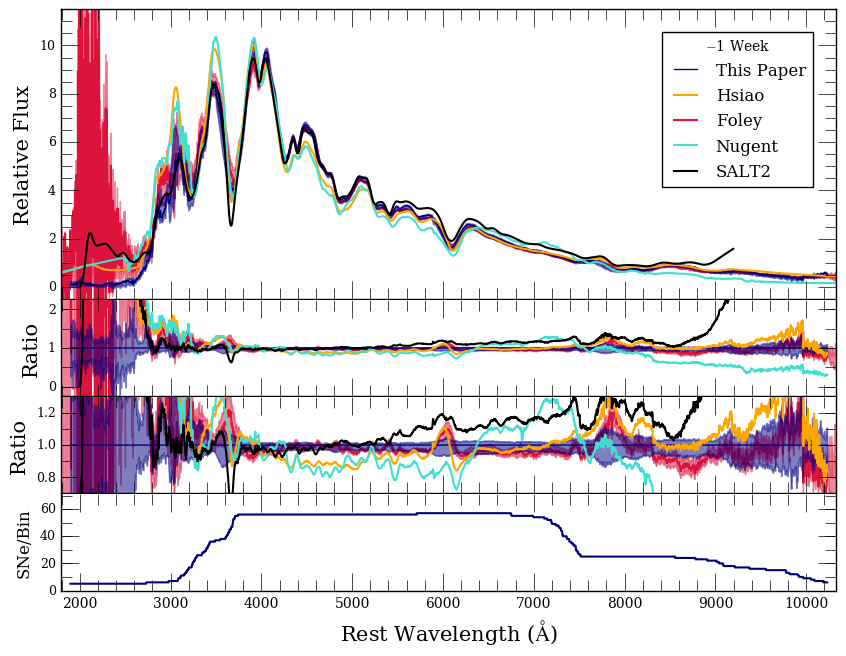

In [72]:
query_db.set_min_num_spec(composites_m1week, 5)
comps_and_temps = []
for comp in composites_m1week:
    comps_and_temps.append(comp)
    
srange = np.where((s_template_m1week.wavelength > 2000.) & (s_template_m1week.wavelength < 9200))[0]
s_template_m1week.x1 = srange[0]
s_template_m1week.x2 = srange[-1]

comps_and_temps.append(h_template_m1week)
comps_and_temps.append(f08_template_m7)
comps_and_temps.append(n_template_m1week)
comps_and_temps.append(s_template_m1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Foley"
comps_and_temps[4].name = "Nugent"
comps_and_temps[5].name = "SALT2"
for comp in comps_and_temps:
    v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
    print comp.name, 'v = ', v_strong
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
                     legend_labels = ["This Paper", "Hsiao", "Foley", "Nugent","SALT2"], 
                     rm_last_label=False, text='$-$1 Week',
                     savename = 'template_comparisons_updated/temp_m7_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper", "Hsiao", "Foley", "Nugent","SALT2"], text='$-$1 Week',
#                      rm_last_label=True)
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

In [73]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["Composite Spectrum \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley+08","Nugent","SALT2"], 
#                      rm_last_label=True, text='$-$1 Week',
#                      savename = 'template_comparisons_updated/temp_m7_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley","Nugent","SALT2"], 
#                      rm_last_label=True, text='$-$1 Week',)
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 0.98 < \Delta m_{15} (B) < 1.18$)", "Hsiao", "Nugent","SALT2"])

In [74]:
wave_h_1month = []
flux_h_1month = []
for i, phase in enumerate(phase_h):
    if float(phase) == 30.0:
        wave_h_1month.append(wavelength_hsiao[i])
        flux_h_1month.append(flux_hsiao[i])

In [75]:
wave_interp_h_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1month = inter.splrep(wave_h_1month, flux_h_1month)
flux_interp_h_1month = inter.splev(wave_interp_h_1month, flux_spl_h_1month, ext = 3)
h_template_1month = composite.supernova(wave_interp_h_1month, flux_interp_h_1month)
h_template_1month.phase_array = np.zeros(len(flux_interp_h_1month))

In [76]:
wave_n_1month = []
flux_n_1month = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 50.0:
        wave_n_1month.append(wavelength_nugent[i])
        flux_n_1month.append(flux_nugent[i])

In [77]:
wave_interp_n_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1month = inter.splrep(wave_n_1month, flux_n_1month)
flux_interp_n_1month = inter.splev(wave_interp_n_1month, flux_spl_n_1month, ext = 3)
n_template_1month = composite.supernova(wave_interp_n_1month, flux_interp_n_1month)
n_template_1month.phase_array = np.zeros(len(flux_interp_n_1month))

In [78]:
wave_s_1month = []
flux_s_1month = []
for i, phase in enumerate(phase_s):
    if float(phase) == 30.0:
        wave_s_1month.append(wavelength_salt[i])
        flux_s_1month.append(flux_salt[i])

In [79]:
wave_interp_s_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_1month = inter.splrep(wave_s_1month, flux_s_1month)
flux_interp_s_1month = inter.splev(wave_interp_s_1month, flux_spl_s_1month, ext = 3)
s_template_1month = composite.supernova(wave_interp_s_1month, flux_interp_s_1month)
s_template_1month.phase_array = np.zeros(len(flux_interp_s_1month))

In [ ]:
query_1month = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 28 and phase < 32 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))",
         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 28 and phase <= 32 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2))"]

In [ ]:
composites_1month, sn_arrays_1month, boot_sn_arrays_tmonth = query_db.main(len(query_1month), query_1month, boot=True, medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 28 and phase < 32 and ((dm15_source >= .5 and dm15_source < 1.8) or (dm15_from_fits >= .5 and dm15_from_fits < 1.8))
116 Total Spectra found
1 flagged spectra removed 115 spectra left
3 spectra of peculiar Ias removed 112 spectra left
105 spectra of SNe with that have host reddening corrections
Arrays cleaned
3 spectra may have telluric contamination
74 total SNe
removed spectra of SNe with A_V > 2.0

Using 99 spectra of 68 SNe
Gini balancing...
Balanced after 18 iterations
Bootstrapping


In [ ]:
query_db.set_min_num_spec(composites_1month, 5)
comps_and_temps = []
for comp in composites_1month:
    comps_and_temps.append(comp)

srange = np.where((s_template_1month.wavelength > 2000.) & (s_template_1month.wavelength < 9200))[0]
s_template_1month.x1 = srange[0]
s_template_1month.x2 = srange[-1]

comps_and_temps.append(h_template_1month)
comps_and_temps.append(n_template_1month)
comps_and_temps.append(s_template_1month)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Nugent"
comps_and_temps[4].name = "SALT2"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["This Paper", "Hsiao", "Nugent","SALT2"], text='$+$1 Month',
                     rm_last_label=True,
                     savename = 'template_comparisons_updated/temp_p30_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
#                      legend_labels = ["This Paper", "Hsiao", "Nugent","SALT2"], text='$+$1 Month',
#                      rm_last_label=True)
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

In [ ]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Nugent","SALT2"], 
                     rm_last_label=True, text='$+$1 Month',
                     savename = 'template_comparisons_updated/temp_p30_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Nugent","SALT2"], 
#                      rm_last_label=True, text='$+$1 Month',)
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 0.95 < \Delta m_{15} (B) < 1.15$)", "Hsiao", "Nugent","SALT2"])

## 91t and 91bg nugent maximum light comparisons

In [ ]:
# query_91t = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source <= .9) or (dm15_from_fits <= .9)) and Supernovae.SN !='2002bf'"]

In [ ]:
# composites_91t, sn_arrays_91t, boot_sn_arrays_91t = query_db.main(len(query_91t), query_91t, boot='b', medmean=1, verbose=False)

In [ ]:
# query_db.set_min_num_spec(composites_91t, 5)

In [ ]:
# comps_and_temps = []
# for comp in composites_91t:
#     comps_and_temps.append(comp)
# comps_and_temps.append(n_template_91t)
# comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

# print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
# comps_and_temps[0].name = "Comp"
# comps_and_temps[1].name = "Nugent"
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], legend_labels = ["Composite Spectrum \n($ 0.75 < \Delta m_{15} (B) < 0.90$)", "Nugent-91T"])

In [ ]:
query_91bg = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.8) or (dm15_from_fits >= 1.8))"]

In [ ]:
composites_91bg, sn_arrays_91bg, boot_sn_arrays_91bg = query_db.main(len(query_91bg), query_91bg, boot=True, medmean=1, gini_balance=True, verbose=False)

In [ ]:
query_db.set_min_num_spec(composites_91bg, 5)
comps_and_temps = []
for comp in composites_91bg:
    comps_and_temps.append(comp)
comps_and_temps.append(n_template_91bg)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Nugent"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, 
                     legend_labels = ["This Paper \n($\Delta m_{15} (B) > 1.8$)", "Nugent-91bg"], 
                     rm_last_label=True, expand_ratio=True, text='Maximum Light',
                     savename = 'template_comparisons_updated/temp_max_light_91bg')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, 
#                      legend_labels = ["This Paper \n($\Delta m_{15} (B) > 1.8$)", "Nugent-91bg"], 
#                      rm_last_label=True, expand_ratio=True, text='Maximum Light')